Load necessary packages

In [1]:
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
%matplotlib inline
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cmocean

plt.style.use("thesis")

Read in mixing rate ($\mathcal{M}$) time series for each simulation

In [2]:
with h5py.File("gkb_stats/U1/APE.h5","r") as f:
    tiiU1 = f["tii"][()]
    MU1 = f["M"][()]

with h5py.File("gkb_stats/U2/APE.h5","r") as f:
    tiiU2 = f["tii"][()]
    MU2 = f["M"][()]
    
with h5py.File("gkb_stats/U3/APE.h5","r") as f:
    tiiU3 = f["tii"][()]
    MU3 = f["M"][()]
    
with h5py.File("gkb_stats/U4/APE.h5","r") as f:
    tiiU4 = f["tii"][()]
    MU4 = f["M"][()]
    
with h5py.File("gkb_stats/F1/APE.h5","r") as f:
    tiiF1 = f["tii"][()]
    MF1 = f["M"][()]
    
with h5py.File("gkb_stats/F2/APE.h5","r") as f:
    tiiF2 = f["tii"][()]
    MF2 = f["M"][()]
    
with h5py.File("gkb_stats/F3/APE.h5","r") as f:
    tiiF3 = f["tii"][()]
    MF3 = f["M"][()]

Read in time series of $\overline{\varepsilon}$, $\varepsilon^\prime$, and $\chi$ for each simulation

In [3]:
with h5py.File("gkb_stats/U1/budgets.h5","r") as f:
    tU1 = f["t"][()]
    eMU1 = f["epsM"][()]
    ePU1 = f["epsP"][()]
    cTU1 = f["chiM"][()] + f["chiP"][()]
eTU1 = eMU1 + ePU1

with h5py.File("gkb_stats/U2/budgets.h5","r") as f:
    tU2 = f["t"][()]
    eMU2 = f["epsM"][()]
    ePU2 = f["epsP"][()]
    cTU2 = f["chiM"][()] + f["chiP"][()]
eTU2 = eMU2 + ePU2

with h5py.File("gkb_stats/U3/budgets.h5","r") as f:
    tU3 = f["t"][()]
    eMU3 = f["epsM"][()]
    ePU3 = f["epsP"][()]
    cTU3 = f["chiM"][()] + f["chiP"][()]
eTU3 = eMU3 + ePU3

with h5py.File("gkb_stats/U4/budgets.h5","r") as f:
    tU4 = f["t"][()]
    eMU4 = f["epsM"][()]
    ePU4 = f["epsP"][()]
    cTU4 = f["chiM"][()] + f["chiP"][()]
eTU4 = eMU4 + ePU4

with h5py.File("gkb_stats/F1/budgets.h5","r") as f:
    tF1 = f["t"][()]
    eMF1 = f["epsM"][()]
    ePF1 = f["epsP"][()]
    cTF1 = f["chiM"][()] + f["chiP"][()]
eTF1 = eMF1 + ePF1

with h5py.File("gkb_stats/F2/budgets.h5","r") as f:
    tF2 = f["t"][()]
    eMF2 = f["epsM"][()]
    ePF2 = f["epsP"][()]
    cTF2 = f["chiM"][()] + f["chiP"][()]
eTF2 = eMF2 + ePF2

with h5py.File("gkb_stats/F3/budgets.h5","r") as f:
    tF3 = f["t"][()]
    eMF3 = f["epsM"][()]
    ePF3 = f["epsP"][()]
    cTF3 = f["chiM"][()] + f["chiP"][()]
eTF3 = eMF3 + ePF3

Interpolate $\chi$ records onto coarser time series

In [4]:
cIF1 = np.interp(tiiF1, tF1, cTF1)
cIF2 = np.interp(tiiF2, tF2, cTF2)
cIF3 = np.interp(tiiF3, tF3, cTF3)

In [5]:
cIU1 = np.interp(tiiU1, tU1, cTU1)
cIU2 = np.interp(tiiU2, tU2, cTU2)
cIU3 = np.interp(tiiU3, tU3, cTU3)
cIU4 = np.interp(tiiU4, tU4, cTU4)

Numerically integrate both time series to obtain, e.g.
$$\chi_c(t) = \int_{t_0}^{t} \chi dt^\prime $$

In [6]:
ccU1, McU1 = np.zeros(cTU1.size), np.zeros(MU1.size)
for i in range(tU1.size):
    ccU1[i] = np.trapz(cTU1[:i+1], x=tU1[:i+1])
for i in range(tiiU1.size):
    McU1[i] = np.trapz(MU1[:i+1], x=tiiU1[:i+1])

ccU2, McU2 = np.zeros(cTU2.size), np.zeros(MU2.size)
for i in range(tU2.size):
    ccU2[i] = np.trapz(cTU2[:i+1], x=tU2[:i+1])
for i in range(tiiU2.size):
    McU2[i] = np.trapz(MU2[:i+1], x=tiiU2[:i+1])
    
ccU3, McU3 = np.zeros(cTU3.size), np.zeros(MU3.size)
for i in range(tU3.size):
    ccU3[i] = np.trapz(cTU3[:i+1], x=tU3[:i+1])
for i in range(tiiU3.size):
    McU3[i] = np.trapz(MU3[:i+1], x=tiiU3[:i+1])
    
ccU4, McU4 = np.zeros(cTU4.size), np.zeros(MU4.size)
for i in range(tU4.size):
    ccU4[i] = np.trapz(cTU4[:i+1], x=tU4[:i+1])
for i in range(tiiU4.size):
    McU4[i] = np.trapz(MU4[:i+1], x=tiiU4[:i+1])
    
N1 = np.nonzero(tF1==tiiF1[0])[0][0]
ccF1, McF1 = np.zeros(cTF1[N1:].size), np.zeros(MF1.size)
for i in range(tF1[N1:].size):
    ccF1[i] = np.trapz(cTF1[N1:N1+i+1], x=tF1[N1:N1+i+1])
for i in range(tiiF1.size):
    McF1[i] = np.trapz(MF1[:i+1], x=tiiF1[:i+1])

N2 = np.nonzero(tF2==tiiF2[0])[0][0]
ccF2, McF2 = np.zeros(cTF2[N2:].size), np.zeros(MF2.size)
for i in range(tF2[N2:].size):
    ccF2[i] = np.trapz(cTF2[N2:N2+i+1], x=tF2[N2:N2+i+1])
for i in range(tiiF2.size):
    McF2[i] = np.trapz(MF2[:i+1], x=tiiF2[:i+1])
    
N3 = np.nonzero(tF3==tiiF3[0])[0][0]
ccF3, McF3 = np.zeros(cTF3[N3:].size), np.zeros(MF3.size)
for i in range(tF3[N3:].size):
    ccF3[i] = np.trapz(cTF3[N3:N3+i+1], x=tF3[N3:N3+i+1])
for i in range(tiiF1.size):
    McF3[i] = np.trapz(MF3[:i+1], x=tiiF3[:i+1])

Interpolate integrated $\chi_c$ time series to coarse grid and compute fractions

In [7]:
ciU1 = np.interp(tiiU1, tU1, ccU1)
ciU2 = np.interp(tiiU2, tU2, ccU2)
ciU3 = np.interp(tiiU3, tU3, ccU3)
ciU4 = np.interp(tiiU4, tU4, ccU4)
ciF1 = np.interp(tiiF1, tF1[N1:], ccF1)
ciF2 = np.interp(tiiF2, tF2[N2:], ccF2)
ciF3 = np.interp(tiiF3, tF3[N3:], ccF3)

fracU1, fracU2 = np.zeros(ciU1.size), np.zeros(ciU2.size)
fracU3, fracU4 = np.zeros(ciU3.size), np.zeros(ciU4.size)
fracF1, fracF2, fracF3 = np.zeros(ciF1.size), np.zeros(ciF2.size), np.zeros(ciF3.size)

fracU1[0], fracU2[0] = cTU1[0]/MU1[0], cTU2[0]/MU2[0]
fracU3[0], fracU4[0] = cTU3[0]/MU3[0], cTU4[0]/MU4[0]
fracF1[0], fracF2[0], fracF3[0] = cTF1[N1]/MF1[0], cTF2[N2]/MF2[0], cTF3[N3]/MF3[0]

fracU1[1:], fracU2[1:] = ciU1[1:]/McU1[1:], ciU2[1:]/McU2[1:]
fracU3[1:], fracU4[1:] = ciU3[1:]/McU3[1:], ciU4[1:]/McU4[1:]
fracF1[1:], fracF2[1:], fracF3[1:] = ciF1[1:]/McF1[1:], ciF2[1:]/McF2[1:], ciF3[1:]/McF3[1:]

Define figure annotation functions

In [8]:
def anno_tl(ax, str):
    l, r = ax.get_xlim()
    b, t = ax.get_ylim()
    ax.annotate(str, (l, t), xytext=(3, -3), textcoords="offset points", ha='left', va='top')
    return

def anno_bl(ax, str):
    l, r = ax.get_xlim()
    b, t = ax.get_ylim()
    ax.annotate(str, (l, b), xytext=(3, 3), textcoords="offset points", ha='left', va='bottom')
    return

## Plot figure 8

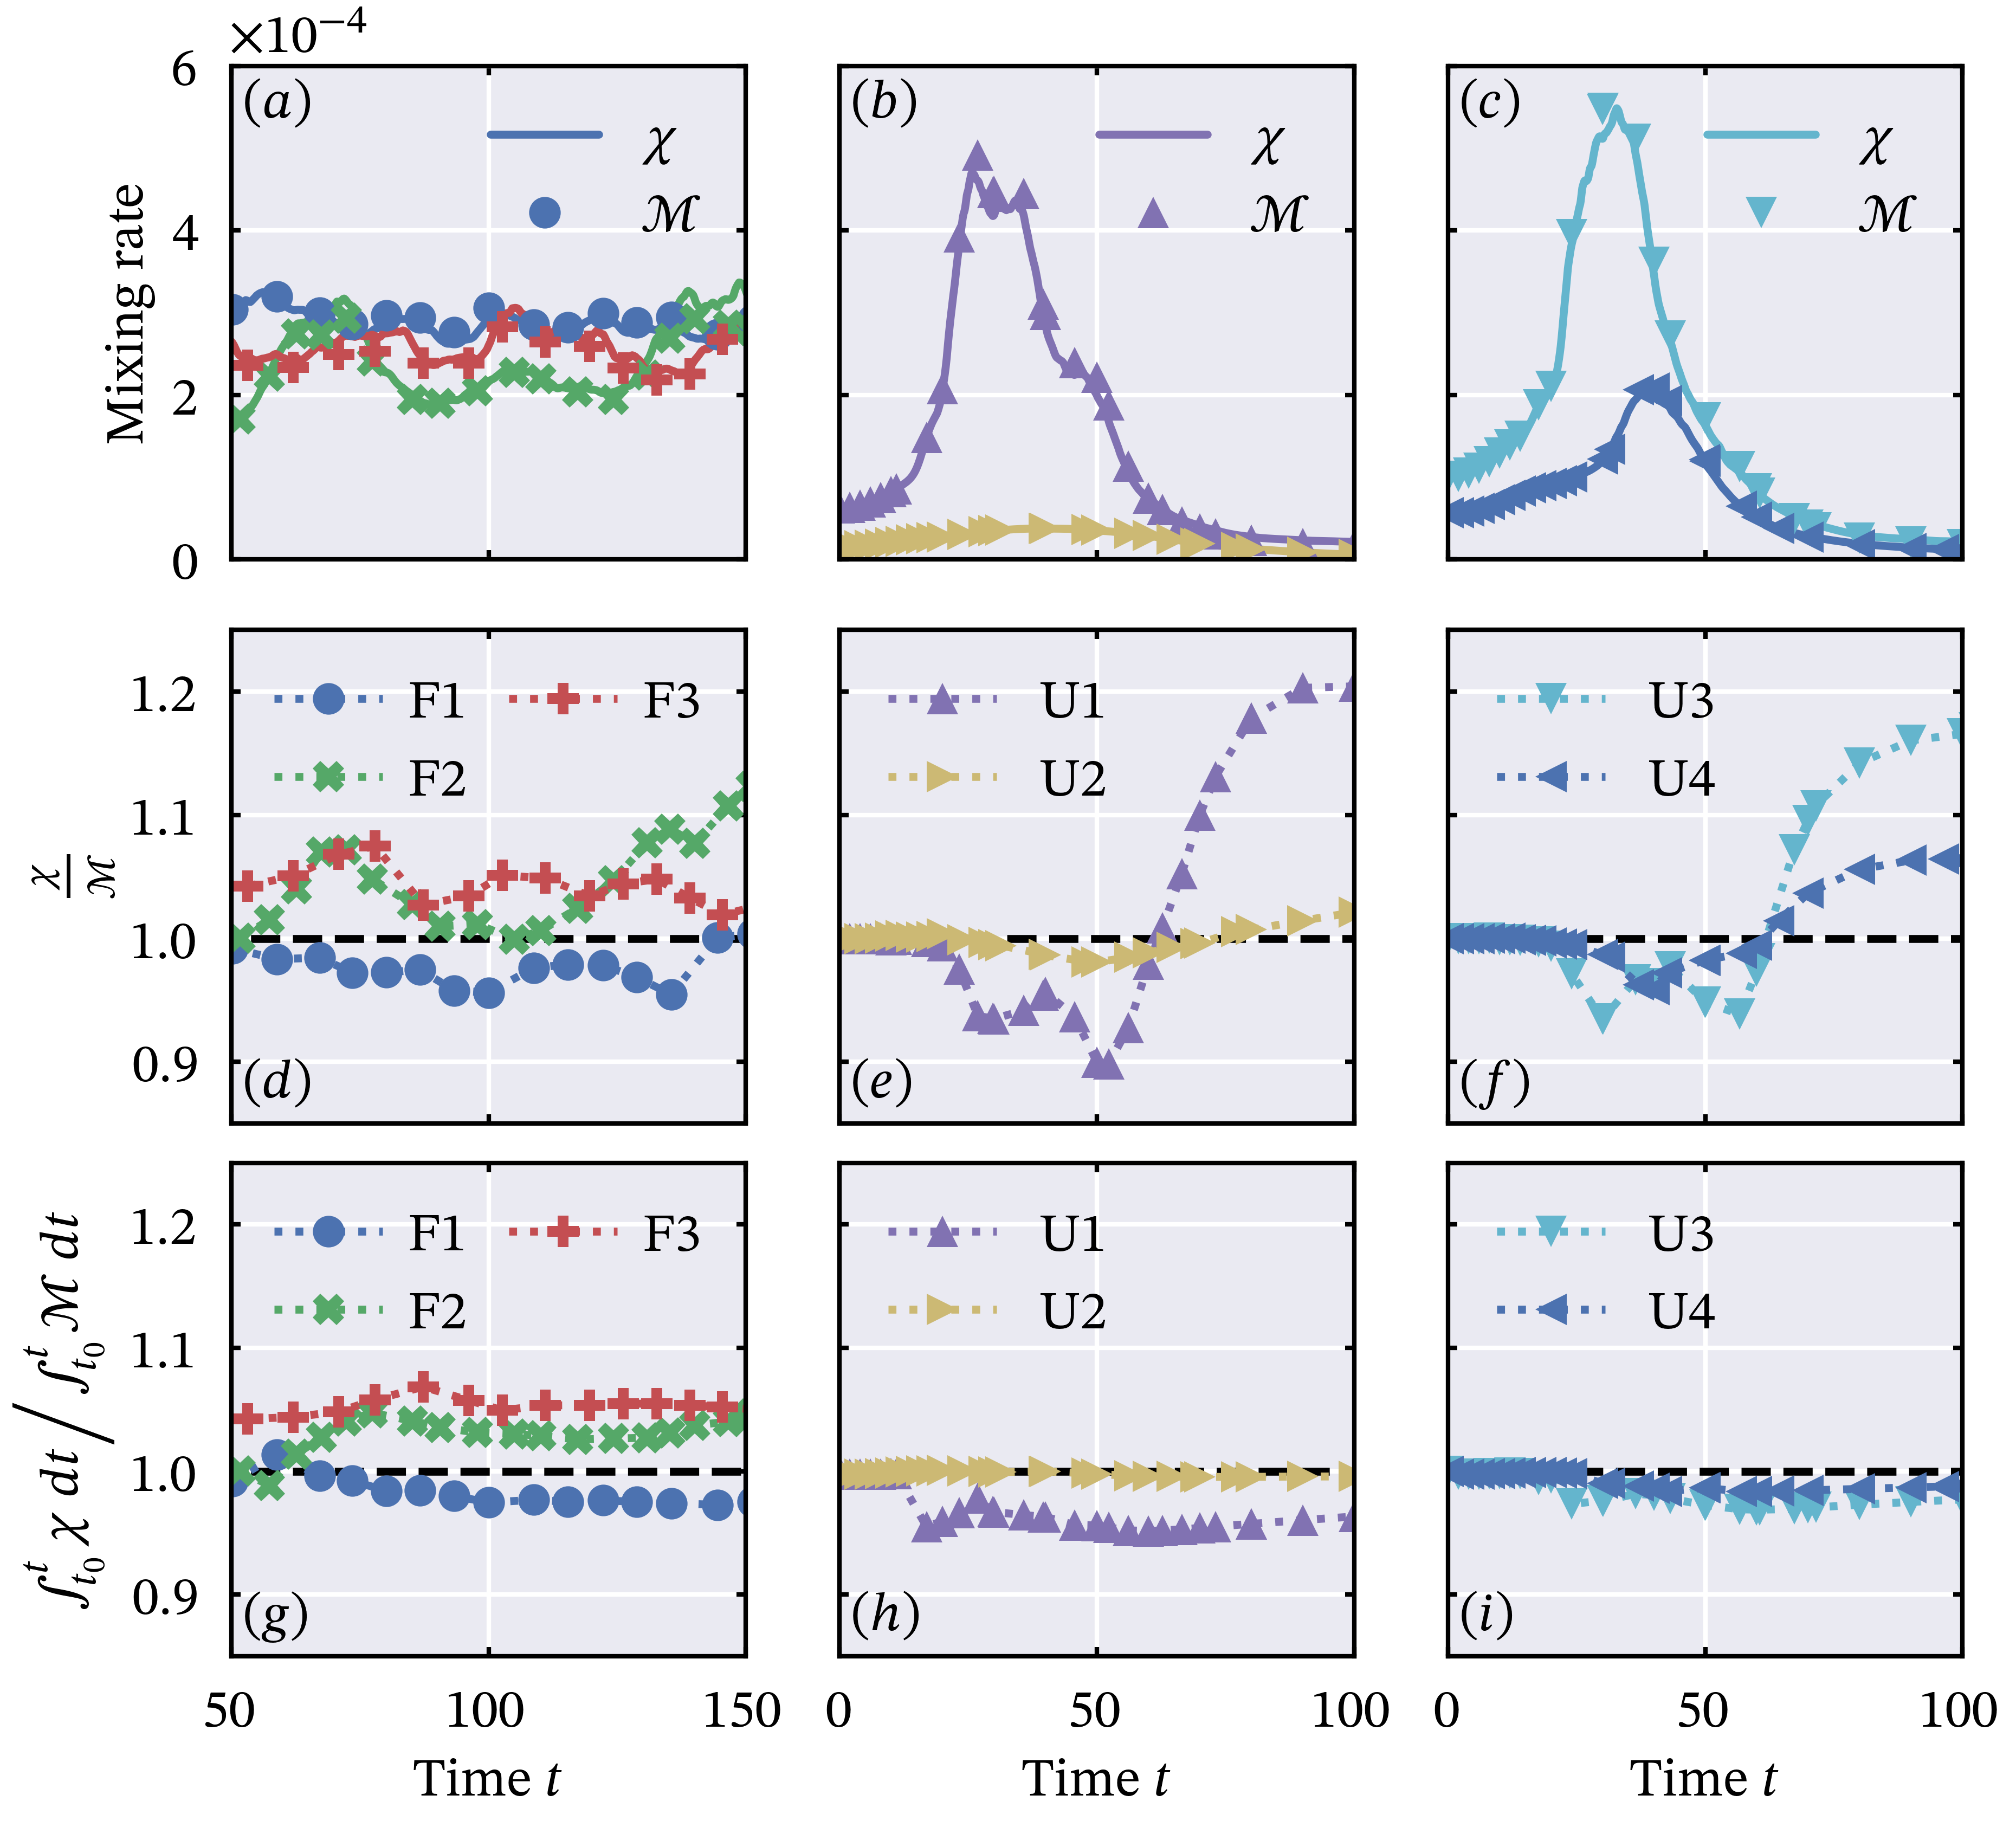

In [9]:
fig, axs = plt.subplots(3,3, sharex='col', sharey='row', figsize=(6.2,5.6))

ax=axs[0,0]
ax.plot(tF1, cTF1, label=r"$\chi$", color="C0")
ax.plot(tF2, cTF2, color="C1")
ax.plot(tF3, cTF3, color="C2")
ax.plot(tiiF1, MF1,'o', label=r"$\mathcal{M}$", color="C0")
ax.plot(tiiF2, MF2,'X', color="C1")
ax.plot(tiiF3, MF3,'P', color="C2")
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.legend()
ax.set(
    xlim=[50,150],
    ylabel="Mixing rate",
#     yscale='log',
    ylim=[0,6e-4]
)

ax=axs[0,1]
ax.plot(tU1, cTU1, label=r"$\chi$", color="C3")
ax.plot(tU2, cTU2, color="C4")
ax.plot(tiiU1, MU1,'^', label=r"$\mathcal{M}$", color="C3")
ax.plot(tiiU2, MU2,'>', color="C4")
ax.legend()
ax.set(xlim=[0,100])

ax=axs[0,2]
ax.plot(tU3, cTU3, label=r"$\chi$", color="C5")
ax.plot(tU4, cTU4, color="C6")
# ax.plot(0, 0,'o', label="U1", color="C0")
# ax.plot(0, 0,'o', label="U2", color="C1")
ax.plot(tiiU3, MU3,'v', label=r"$\mathcal{M}$", color="C5")
ax.plot(tiiU4, MU4,'<', color="C6")
ax.legend()
ax.set(xlim=[0,100])

ax=axs[1,0]
ax.plot(tF1, np.ones(tF1.size),'k--')
ax.plot(tiiF1, cIF1/MF1,':o', label="F1", color="C0")
ax.plot(tiiF2, cIF2/MF2,':X', label="F2", color="C1")
ax.plot(tiiF3, cIF3/MF3,':P', label="F3", color="C2")
ax.legend(ncol=2, loc='upper center', handletextpad=0.5, columnspacing=0.75)
ax.set(
    ylabel=r"$\frac{\chi}{\mathcal{M}}$",
    ylim=[0.85,1.25]
)

ax=axs[1,1]
ax.plot(tU1, np.ones(tU1.size),'k--')
ax.plot(tiiU1, cIU1/MU1,':^', label="U1", color="C3")
ax.plot(tiiU2, cIU2/MU2,':>', label="U2", color="C4")
ax.legend()

ax=axs[1,2]
ax.plot(tU3, np.ones(tU3.size),'k--')
ax.plot(tiiU3, cIU3/MU3,':v', label="U3", color="C5")
ax.plot(tiiU4, cIU4/MU4,':<', label="U4", color="C6")
ax.legend()

ax=axs[2,0]
ax.plot(tF1, np.ones(tF1.size),'k--')
ax.plot(tiiF1, fracF1,':o', label="F1", color="C0")
ax.plot(tiiF2, fracF2,':X', label="F2", color="C1")
ax.plot(tiiF3, fracF3,':P', label="F3", color="C2")
ax.legend(ncol=2, loc='upper center', handletextpad=0.5, columnspacing=0.75)
ax.set(
    ylabel=r"$\left. \int_{t_0}^t \chi \ dt \right/ \int_{t_0}^t \mathcal{M} \ dt$",
#     ylabel="ylabel",
    xlabel="Time $t$",
    ylim=[0.85,1.25]
)

ax=axs[2,1]
ax.plot(tU1, np.ones(tU1.size),'k--')
ax.plot(tiiU1, fracU1,':^', label="U1", color="C3")
ax.plot(tiiU2, fracU2,':>', label="U2", color="C4")
ax.legend(loc='upper left')
ax.set(
    xlabel="Time $t$"
)

ax=axs[2,2]
ax.plot(tU3, np.ones(tU3.size),'k--')
ax.plot(tiiU3, fracU3,':v', label="U3", color="C5")
ax.plot(tiiU4, fracU4,':<', label="U4", color="C6")
ax.legend(loc='upper left')
ax.set(
    xlabel="Time $t$"
)
# fig.savefig("tmp_figures/mix_fig.svg")

anno_tl(axs[0,0], "$(a)$")
anno_tl(axs[0,1], "$(b)$")
anno_tl(axs[0,2], "$(c)$")
anno_bl(axs[1,0], "$(d)$")
anno_bl(axs[1,1], "$(e)$")
anno_bl(axs[1,2], "$(f)$")
anno_bl(axs[2,0], "$(g)$")
anno_bl(axs[2,1], "$(h)$")
anno_bl(axs[2,2], "$(i)$")

# fig.savefig("mix_fig.pdf")
# fig.savefig("EPS/mix_fig.eps")

plt.show()